Max Wang<br/>
PHYS 434<br/>
HW2

In [85]:
%matplotlib inline
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import scipy
import statistics 
from scipy import stats, signal


plt.rcParams["figure.figsize"] = (15,10)

## Part 1

There are 36 different combinations when rolling a 2 six-sided dice. To roll snake eyes, there is only one possible combination: 1-1, meaning the probability is 1/36. To roll sevens, there are six different combinations: 1-6, 2-5, 3-4, 4-3, 5-2, 6-1, meaning the probability is 6/36, or 1/6. The ratio between snake eyes and sevens is then 1:6.

## Part 2

Let p(x) be the probability of sum x from rolling 2 six-sided dice, and 2 <= x <= 12. Then p(x) = (# of combinations summing up to x)/36. The combinations for each sum x is as follows:

For x = 2:  1-1<br/>
For x = 3:  1-2, 2-1<br/>
For x = 4:  1-3, 2-2, 3-1<br/>
For x = 5:  1-4, 2-3, 3-2, 4-1<br/>
For x = 6:  1-5, 2-4, 3-3, 4-2, 5-1<br/>
For x = 7:  1-6, 2-5, 3-4, 4-3, 2-5, 6-1<br/>
For x = 8:  2-6, 3-5, 4-4, 5-3, 6-2<br/>
For x = 9:  3-6, 4-5, 5-4, 6-3<br/>
For x = 10: 4-6, 5-5, 6-4<br/>
For x = 11: 5-6, 6-5<br/>
For x = 12: 6-6<br/>

In program, we can determine the probability of the sum of 2 six-sided dice using convolution through scipy's signal package. We first create an array of probabilies of a single six-sided die, and then convolute the two together.

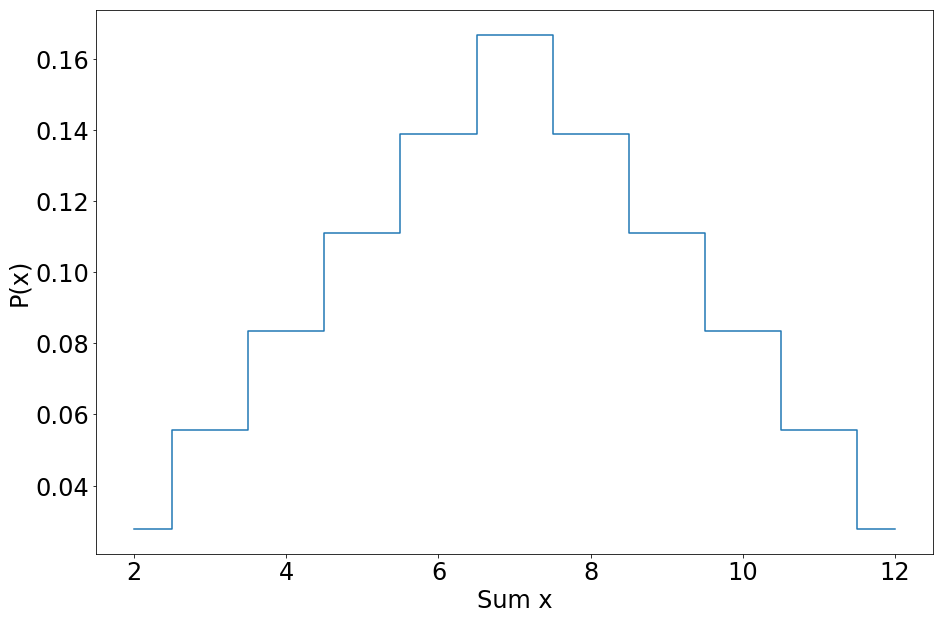

In [86]:
single_prob = np.multiply(np.ones(6), 1/6)
sum_prob = signal.convolve(single_prob, single_prob)

x = np.linspace(2, 12, 11)
plt.step(x, sum_prob, where='mid')
plt.tick_params(labelsize = 24)
plt.xlabel("Sum x",fontsize=24)
plt.ylabel("P(x)",fontsize=24)

plt.show()
plt.rcParams["figure.figsize"] = (15,10)

## Part 3

Mean of a discrete distribution = sum(P(x) \* x)<br/>
Variance of a discrete distribution = sum\[P(x) \* (x^2 - mean^2)\]  

In [87]:
mean = np.sum(np.multiply(sum_prob, x))
variance = np.sum(np.multiply(sum_prob, np.square(x - mean)))
print('The mean of the two six-sided dice sum distribution is ' + str(mean) +
      ', and it\'s variance is ' + str(variance) + '.')

The mean of the two six-sided dice sum distribution is 6.999999999999998, and it's variance is 5.833333333333333.


## Part 4

To graph the average of the sum of ten dice, we repeat the convolution 8 more times. The result is a much smoother graph, almost resembling a Gaussian distribution. While the distribution resembles like one, it won't become a Gaussian distribution just because we rolled more dice. Fundamentally, Gaussian is continuous, meaning you can fit any number from positive to negative infinity. However, rolling a six-sided die can only result in 6 different possibilities, meaning the distribution is discrete. The more we roll, the more possible sum x begin to appear, and so do the number of possible average sums. This results in a smoother and smoother graph. 

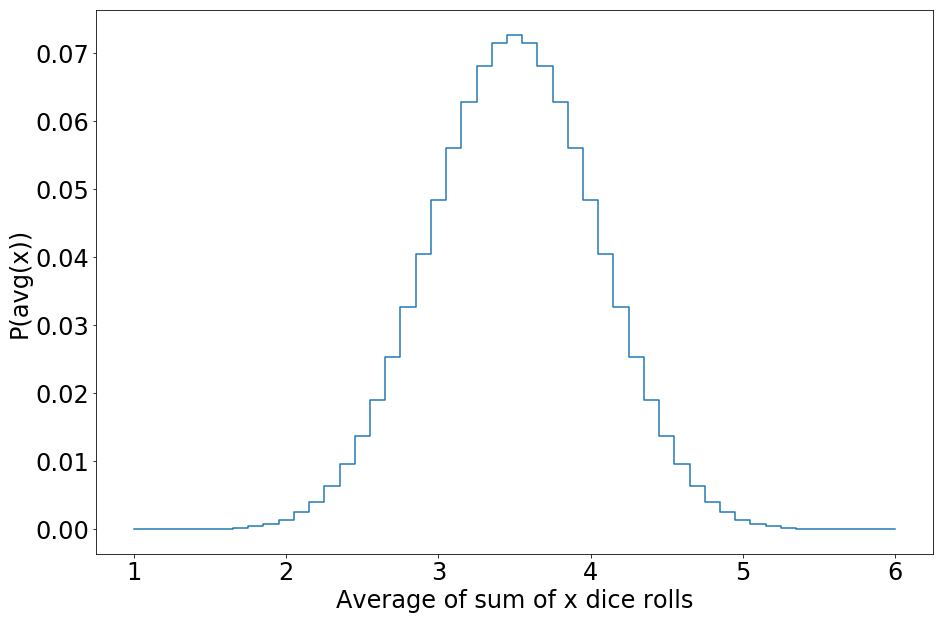

In [88]:
for i in range(8):
    sum_prob = signal.convolve(sum_prob, single_prob)
x = np.linspace(10, 60, 51)
plt.step(np.linspace(1, 6, 51), sum_prob, where='mid')
plt.tick_params(labelsize = 24)
plt.xlabel("Average of sum of x dice rolls",fontsize=24)
plt.ylabel("P(avg(x))",fontsize=24)
plt.show()

Below is the distribution for the average sum of 100 dice rolls. We can see the curve is even more smooth, but it is still discrete. As dice rolls approact infinity, the distribution would approximate Gaussian.

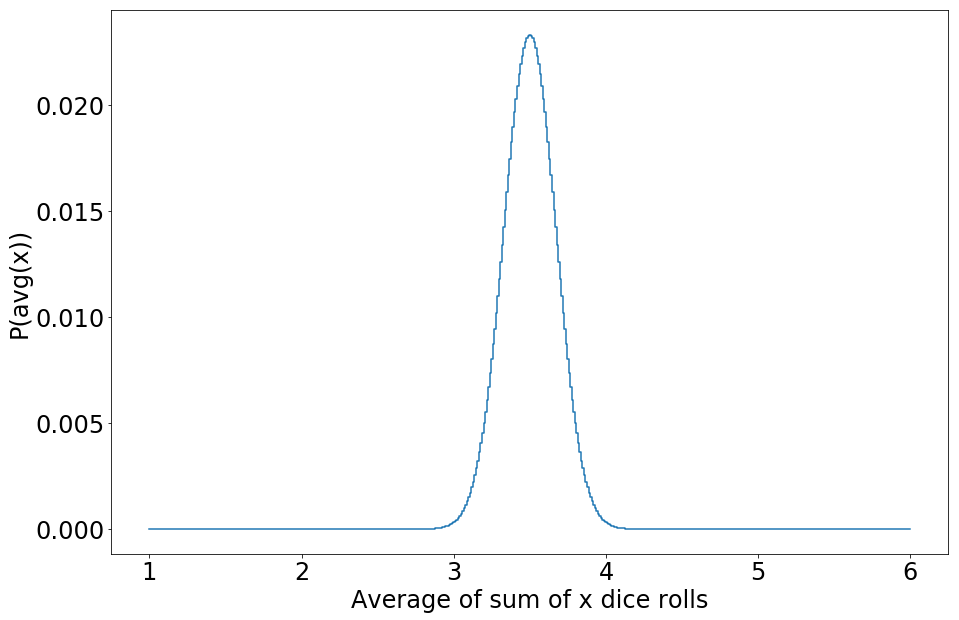

In [89]:
sum_prob = single_prob
for i in range(99):
    sum_prob = signal.convolve(sum_prob, single_prob)
x = np.linspace(100, 600, 501)
plt.step(np.linspace(1, 6, 501), sum_prob, where='mid')
plt.tick_params(labelsize = 24)
plt.xlabel("Average of sum of x dice rolls",fontsize=24)
plt.ylabel("P(avg(x))",fontsize=24)
plt.show()

## Part 5

Below are comparisons between the default (n=1) Gaussian distribution compared the sum and average of sum distributions for n=5, n=10, where n is the number of Gaussians being convoluted. The result of such convolution is represented by the blue curve. 

To show that the sum and the average distributions are still gaussian, the orange curve represents a Gaussian fit to the standard deviation of the convoluted distribution. The fit seems to perfectly align with the convoluted curve, which suggests that the sum and average of an initially Guassian distribution is also Gaussian.

As for standard deviation, it increases with n in the sum distribution, and it decreases with n in the average distribution. In terms of integrating over a signal, the increase in standard deviation means that sigmas around 0 will decrease in probability, and sigmas further away will increase in probability. This makes sense, as we sum up more and more observations, error propagation will be present and makes it more likely that the observation is due to background noise. On the other hand, the standard deviation decreasing from the average distribution is due to law of large numbers, making sigmas around 0 much more probable.

For n=1, StD for sum distribution is 1.0, and StD for the average distribution is 1.0
For n=5, StD for sum distribution is 2.236067977499757, and StD for the average distribution is 0.4472135954999514
For n=10, StD for sum distribution is 3.1622776601692286, and StD for the average distribution is 0.3162277660169228


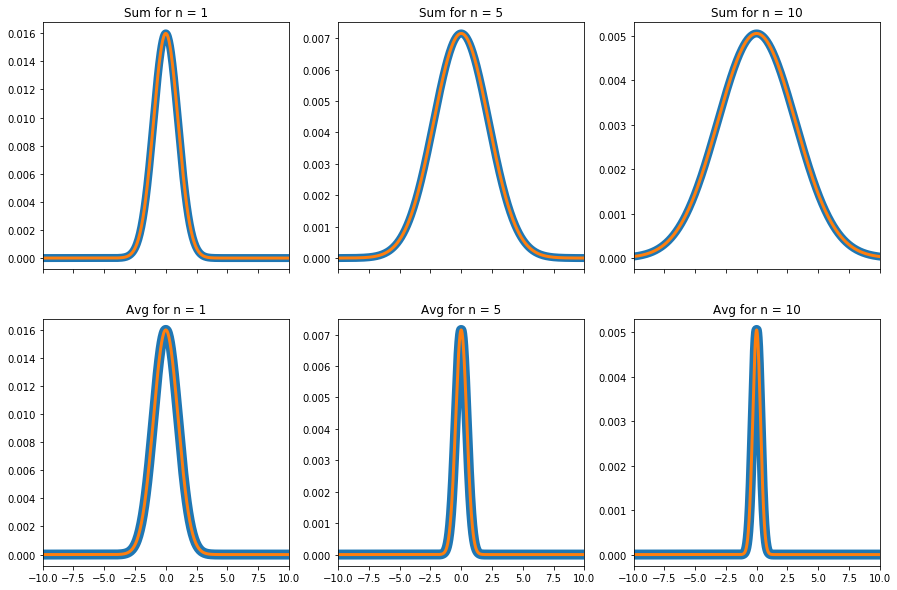

In [90]:
x = np.linspace(-10, 10, 500)
gaussian = stats.norm.pdf(x,0,1)
fig, ax = plt.subplots(2, 3, sharex=True)
n = [1, 5, 10]
for i in n:
    conv = gaussian
    for j in range(i - 1):
        conv = signal.convolve(conv, gaussian)
    x_sum = np.linspace(-10*i, 10*i, len(conv))
    x_avg = np.linspace(-10, 10, len(conv))
    mean_sum = np.sum(np.multiply(conv, x_sum))/np.sum(conv)
    mean_avg = np.sum(np.multiply(conv, x_avg))/np.sum(conv)
    std_sum = np.sqrt(np.sum(np.multiply(conv, np.square(x_sum - mean_sum))/np.sum(conv)))
    std_avg = np.sqrt(np.sum(np.multiply(conv, np.square(x_avg - mean_avg))/np.sum(conv)))
    print('For n=' + str(i) + ', StD for sum distribution is ' + str(std_sum) +
          ', and StD for the average distribution is ' + str(std_avg))
    new_gaus_sum = stats.norm.pdf(x_sum, 0, std_sum)
    new_gaus_avg = stats.norm.pdf(x_avg, 0, std_avg)
    ax[0, n.index(i)].plot(x_sum, conv/np.sum(conv), linewidth=8)
    ax[0, n.index(i)].set_title('Sum for n = ' + str(i))
    ax[0, n.index(i)].plot(x_sum, np.multiply(new_gaus_sum ,max(conv)/max(new_gaus_sum))/np.sum(conv), linewidth=3)
    ax[1, n.index(i)].plot(x_avg, conv/np.sum(conv), linewidth=10)
    ax[1, n.index(i)].set_title('Avg for n = ' + str(i))
    ax[1, n.index(i)].plot(x_avg, np.multiply(new_gaus_avg ,max(conv)/max(new_gaus_avg)/np.sum(conv)), linewidth=3)
plt.xlim([-10, 10])
plt.show()